### NLP

In [15]:
import numpy as np
import kmapper as km
from kmapper import jupyter
import umap
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import aux

In [5]:
newsgroups = fetch_20newsgroups(subset='train')
X, y, target_names = np.array(newsgroups.data), np.array(newsgroups.target), np.array(newsgroups.target_names)
print("SAMPLE", X[3])
print("SHAPE", X.shape)
print("TARGET", target_names[y[3]])

SAMPLE From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters

SHAPE (11314,)
TARGET comp.graphics


In [4]:
target_names

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype='<U24')

In [6]:
vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1,3),
                      max_df=0.97,
                      min_df=0.02)

vec_X = vec.fit_transform(X).toarray()
vec_X_names = vec.get_feature_names()

In [7]:
vec_X.shape

(11314, 947)

### t-SNE

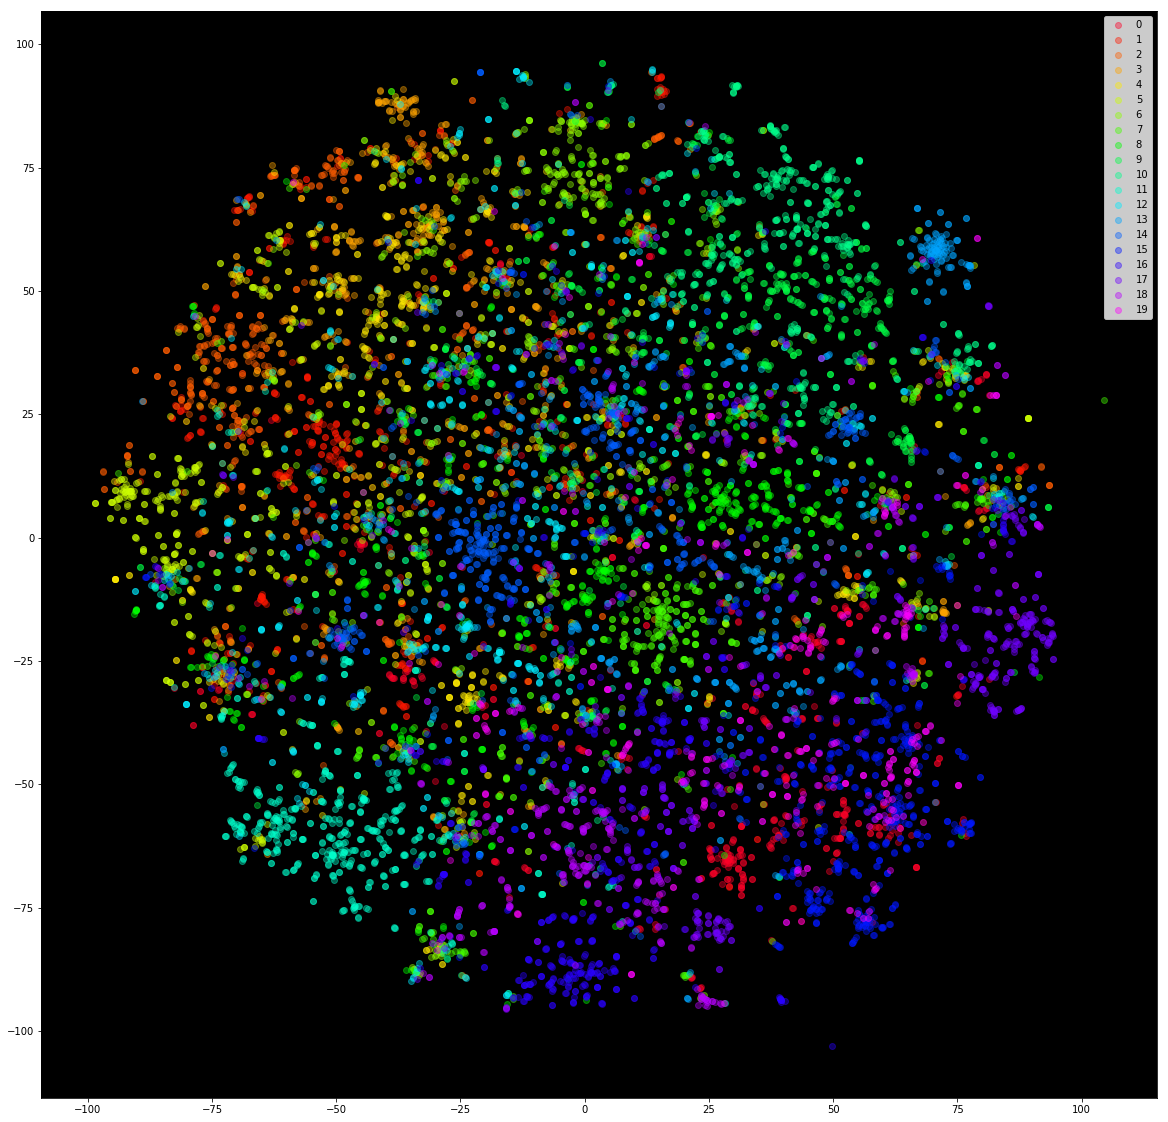

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10.0)
tsne_result = tsne.fit_transform(interpretable_inverse_X)
visualize_scatter(tsne_result, y)

### UMAP

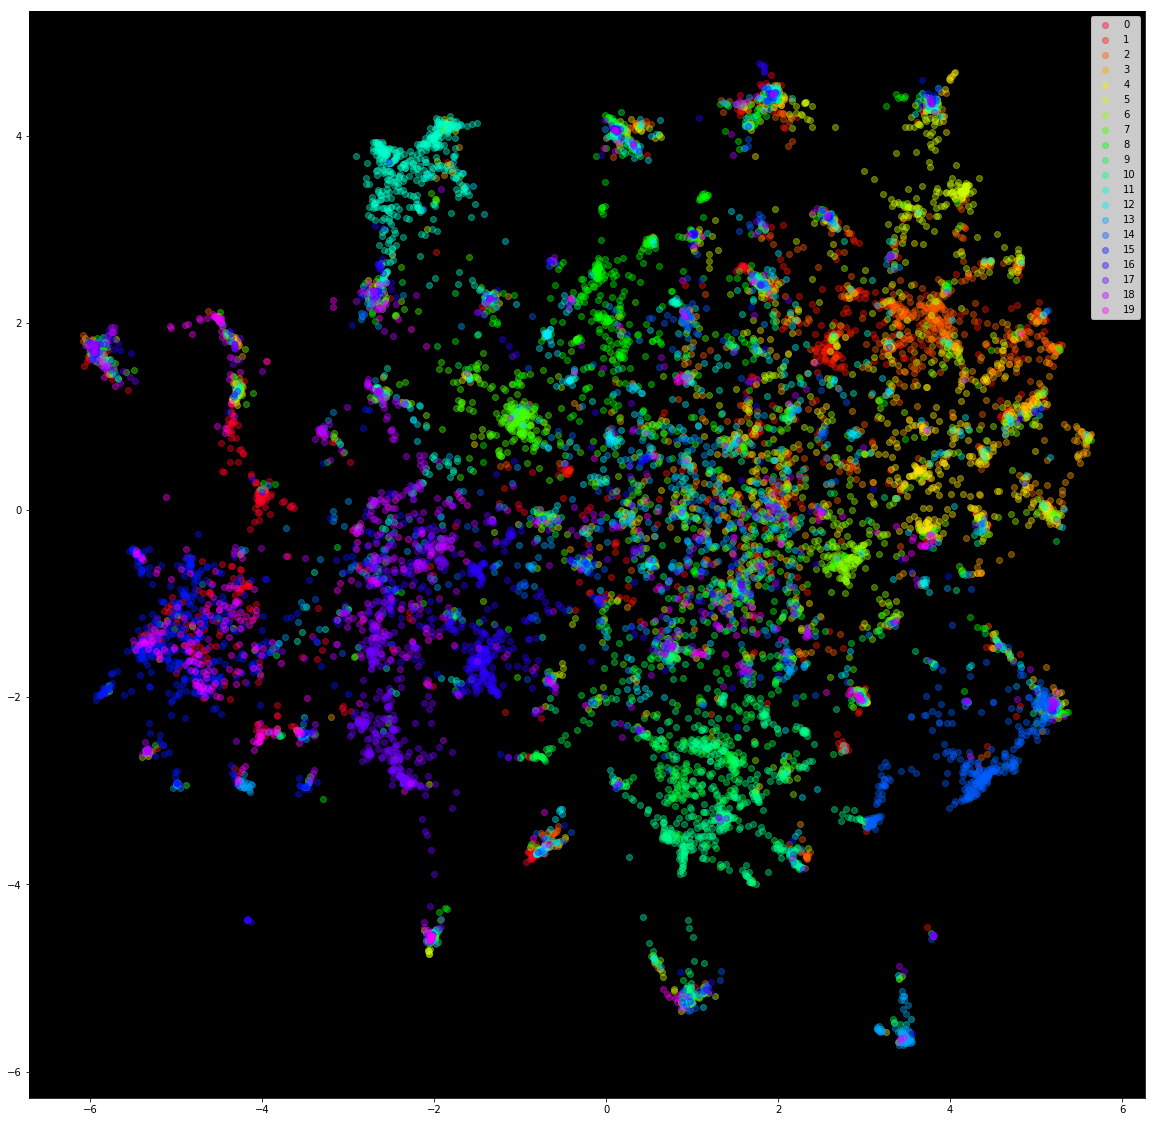

In [33]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(vec_X)
aux.visualize_scatter(embedding, y)

### Mapper

In [7]:
mapper = km.KeplerMapper(verbose=2)

projected_X = mapper.fit_transform(X,
                                projection=[TfidfVectorizer(analyzer="char",
                                ngram_range=(1,6),
                                max_df=0.83,
                                min_df=0.05),
                TruncatedSVD(n_components=100,
                             random_state=1729),
                Isomap(n_components=2,
                       n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()])

print("SHAPE",projected_X.shape)

KeplerMapper()
..Composing projection pipeline of length 3:
	Projections: TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.83, max_features=None, min_df=0.05,
        ngram_range=(1, 6), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
		TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=1729, tol=0.0)
		Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=-1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)
	Distance matrices: False
False
False
	Scalers: None
None
MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (11314,)

..Projecting data using: 
	TfidfVectorizer(analyzer='char', binary=False, decode_error=

In [9]:
from sklearn import cluster
graph = mapper.map(projected_X,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.33)

Mapping on data shaped (11314, 2) using lens shaped (11314, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_12 is empty.

Cube_13 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Fou

In [ ]:
html = mapper.visualize(graph,
                        path_html="newsgroups20.html",
                        title="Newsgroups20: Latent Semantic Char-gram Analysis with Isometric Embedding",
                        custom_tooltips=np.array([target_names[ys] for ys in y]),
                        color_function=y)

In [17]:

jupyter.display("newsgroups20.html")